# 1. Problem Scoping

Masalah: Banyaknya uang palsu yang beredar di masyarakat

Formulasi masalah:
1. Bagaimana cara membuat model machine learning yang dapat digunakan untuk membedakan uang asli dan palsu?
2. Fitur apa saja yang membedakan antara uang asli dan palsu?

Tujuan: Membangun model machine learning untuk mengklasifikasikan uang asli atau palsu.

Deskripsi dataset:
Nama dataset "Banknote Authetication."

Dataset ini merupakan public dataset yang dapat diunduh di
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data diekstraksi dari gambar yang diambil dari spesimen uang kertas asli dan palsu. Memiliki total 1372 data yang berisikan 4 fitur dari uang asli dan palsu.

Fitur:
1. Variance
2. Skewness
3. Curtosis
4. Entropy

Target:
1. Class



# 2. Data Preparation

### Data Collection

In [2]:
import pandas as pd

df = pd.read_excel("/content/BankNote_Authentication.xlsx")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,authentic
1,4.54590,8.16740,-2.4586,-1.46210,authentic
2,3.86600,-2.63830,1.9242,0.10645,authentic
3,3.45660,9.52280,-4.0112,-3.59440,authentic
4,0.32924,-4.45520,4.5718,-0.98880,authentic
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,counterfeit
1358,-1.38870,-4.87730,6.4774,0.34179,counterfeit
1359,-3.75030,-13.45860,17.5932,-2.77710,counterfeit
1360,-3.56370,-8.38270,12.3930,-1.28230,counterfeit


In [3]:
df.shape

(1362, 5)

### Data Exploration

In [5]:
df['class'].value_counts()

authentic      757
counterfeit    605
Name: class, dtype: int64

In [6]:
df.describe()

,variance,skewness,curtosis,entropy
count,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.443521,1.916458,1.396395,-1.177602
std,2.839102,5.865625,4.312428,2.089540
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.767250,-1.701475,-1.631525,-2.389550
50%,0.505190,2.301000,0.622630,-0.580830
75%,2.823575,6.809500,3.183950,0.396752
max,6.824800,12.951600,17.927400,2.449500


In [10]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1
1358,-1.38870,-4.87730,6.4774,0.34179,1
1359,-3.75030,-13.45860,17.5932,-2.77710,1
1360,-3.56370,-8.38270,12.3930,-1.28230,1


In [36]:
# Outliers detection and removal
df['z-score1'] = abs((df.variance - df.variance.mean())/df.variance.std())
df['z-score2'] = abs((df.skewness - df.skewness.mean())/df.skewness.std())
df['z-score3'] = abs((df.curtosis - df.curtosis.mean())/df.curtosis.std())
df['z-score4'] = abs((df.entropy - df.entropy.mean())/df.entropy.std())
df

,variance,skewness,curtosis,entropy,class,z-score1,z-score2,z-score3,z-score4
0,3.62160,8.66610,-2.8073,-0.44699,0,1.119396,1.150711,0.974786,0.349652
1,4.54590,8.16740,-2.4586,-1.46210,0,1.444956,1.065691,0.893927,0.136153
2,3.86600,-2.63830,1.9242,0.10645,0,1.205479,0.776517,0.122392,0.614514
3,3.45660,9.52280,-4.0112,-3.59440,0,1.061279,1.296766,1.253956,1.156617
4,0.32924,-4.45520,4.5718,-0.98880,0,0.040252,1.086271,0.736338,0.090356
...,...,...,...,...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1,0.013166,0.096709,0.660068,0.295813
1358,-1.38870,-4.87730,6.4774,0.34179,1,0.645352,1.158233,1.178224,0.727142
1359,-3.75030,-13.45860,17.5932,-2.77710,1,1.477164,2.621214,3.755843,0.765478
1360,-3.56370,-8.38270,12.3930,-1.28230,1,1.411439,1.755850,2.549980,0.050106


In [41]:
df_no_outliers = df[(df["z-score1"]<3) & (df["z-score2"]<3) & (df["z-score3"]<3) & (df["z-score4"]<3)]
df_no_outliers.drop("z-score1", inplace = True, axis =1)
df_no_outliers.drop("z-score2", inplace = True, axis =1)
df_no_outliers.drop("z-score3", inplace = True, axis =1)
df_no_outliers.drop("z-score4", inplace = True, axis =1)
df_no_outliers = df_no_outliers.reset_index(drop = True)
df_no_outliers

<ipython-input-41-a43a7e4b95e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score1", inplace = True, axis =1)
<ipython-input-41-a43a7e4b95e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score2", inplace = True, axis =1)
<ipython-input-41-a43a7e4b95e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score3", inplace = True, axis =1)
<ipython-input-41-a43a7e4

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1323,-2.41000,3.74330,-0.40215,-1.29530,1
1324,0.40614,1.34920,-1.45010,-0.55949,1
1325,-1.38870,-4.87730,6.47740,0.34179,1
1326,-3.56370,-8.38270,12.39300,-1.28230,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_no_outliers.iloc[:,:4])

MinMaxScaler()

In [42]:
X_scaled = scaler.transform(df_no_outliers.iloc[:,:4])
X_scaled = pd.DataFrame(X_scaled, columns = ["variance", "skewness", "curtosis", "entropy"])
df_no_outliers = pd.merge(X_scaled, df_no_outliers.iloc[:,-1:], left_index = True, right_index = True)
df_no_outliers

,variance,skewness,curtosis,entropy,class
0,0.769004,0.836671,0.132141,0.705886,0
1,0.835659,0.817665,0.150729,0.602811,0
2,0.786629,0.405839,0.384369,0.762083,0
3,0.757105,0.869322,0.067963,0.386294,0
4,0.531578,0.336593,0.525508,0.650870,0
...,...,...,...,...,...
1323,0.334040,0.649054,0.260355,0.619748,1
1324,0.537124,0.557810,0.204491,0.694463,1
1325,0.407690,0.320506,0.627092,0.785980,1
1326,0.250842,0.186909,0.942443,0.621068,1


In [43]:
X_clean = df_no_outliers.iloc[:,:4]
y_clean = df_no_outliers.iloc[:, -1]

In [44]:
y_clean.value_counts()

0    747
1    581
Name: class, dtype: int64

<Axes: ylabel='class'>

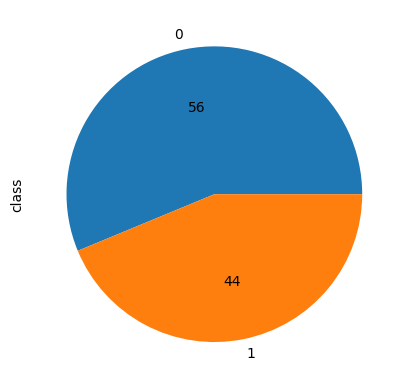

In [46]:
y_clean.value_counts().plot.pie(autopct = '%2.f')

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
X_res_under, y_res_under = rus.fit_resample(X_clean, y_clean)

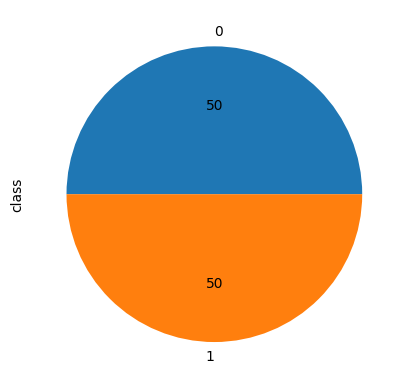

In [48]:
ax = y_res_under.value_counts().plot.pie(autopct = '%2.f')

In [49]:
y_res_under.value_counts()

0    581
1    581
Name: class, dtype: int64

In [50]:
df_clean = pd.merge(X_res_under, y_res_under, left_index = True, right_index = True)
df_clean

,variance,skewness,curtosis,entropy,class
0,0.667143,0.790537,0.210978,0.415974,0
1,0.804924,0.399844,0.392179,0.819725,0
2,0.590565,0.643535,0.385142,0.707199,0
3,0.680996,0.568218,0.443381,0.824058,0
4,0.797842,0.403472,0.414835,0.788475,0
...,...,...,...,...,...
1157,0.334040,0.649054,0.260355,0.619748,1
1158,0.537124,0.557810,0.204491,0.694463,1
1159,0.407690,0.320506,0.627092,0.785980,1
1160,0.250842,0.186909,0.942443,0.621068,1


<Axes: >

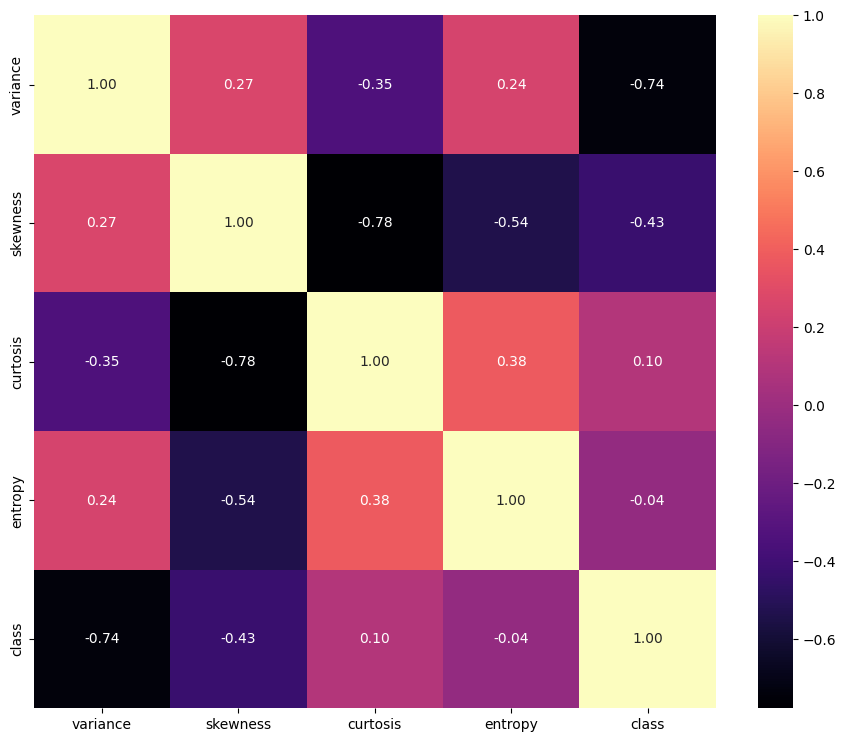

In [55]:
import seaborn as sns

# correlation map (pearson correlation)
plt.figure(figsize=(11,9))
cor = df_clean.corr('pearson')
sns.heatmap(cor, annot = True, cmap = 'magma', fmt='.2f')

In [56]:
cor_target = abs(cor['class'])

relevant_features = cor_target[cor_target>=.4]
relevant_features

variance    0.739280
skewness    0.426694
class       1.000000
Name: class, dtype: float64

In [58]:
df_clean1 = df_clean[["variance", "skewness", "class"]]
df_clean1

,variance,skewness,class
0,0.667143,0.790537,0
1,0.804924,0.399844,0
2,0.590565,0.643535,0
3,0.680996,0.568218,0
4,0.797842,0.403472,0
...,...,...,...
1157,0.334040,0.649054,1
1158,0.537124,0.557810,1
1159,0.407690,0.320506,1
1160,0.250842,0.186909,1


Text(0, 0.5, 'Skewness')

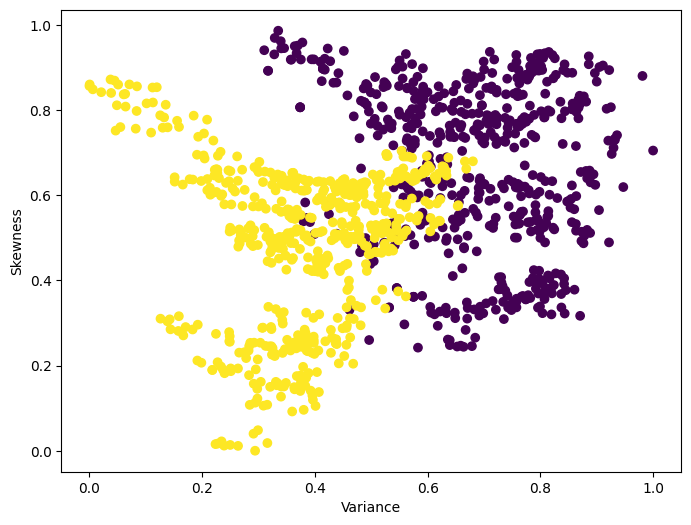

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean1.iloc[:,0], df_clean1.iloc[:,1], c = df_clean1['class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')

In [62]:
X = df_clean.iloc[:,:2]
y = df_clean.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

# 3. Modelling

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier()

cv = KFold(n_splits = 10, random_state = 99, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1, 40), 'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [66]:
from sklearn import metrics

knn_final = KNeighborsClassifier(**gs.best_params_)
knn_final.fit(X_train, y_train)
knn_final.score(X_test, y_test)

0.9656652360515021

In [67]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

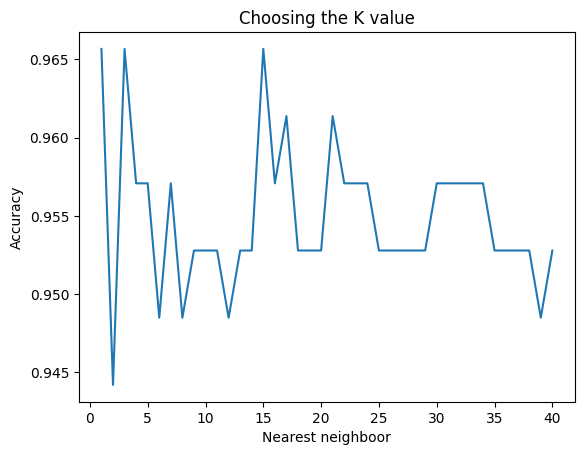

In [68]:
plt.title('Choosing the K value')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

# 4. Deployment

In [69]:
New_data = pd.read_excel("/content/New_data.xlsx")
New_data

,variance,skewness,curtosis,entropy,class
0,-2.215300,11.9625,0.078538,-7.78530,authentic
1,2.126500,6.8783,0.447840,-2.22240,authentic
2,0.007125,8.3661,0.507810,-3.81550,authentic
3,2.289300,3.7330,0.631200,-0.39786,authentic
4,4.339800,-5.3036,3.880300,-0.70432,authentic
5,-5.441400,7.2363,0.109380,-7.56420,counterfeit
6,-4.124400,3.7909,-0.653200,-4.18020,counterfeit
7,-4.195800,-8.1819,12.129100,-1.60170,counterfeit
8,-0.878340,3.2570,-3.677800,-3.29440,counterfeit
9,-0.898090,-4.4862,2.200900,0.50731,counterfeit


In [70]:
X_new = New_data.iloc[:, :2]
y_new = New_data.iloc[:,-1]

In [71]:
y_pred = knn_final.predict(X_new)

In [72]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('authentic')
  elif y_pred[i] == 1:
    diag.append('counterfeit')

diag = pd.DataFrame(diag, columns = ['Predicted class'])

In [73]:
diag

,Predicted class
0,counterfeit
1,authentic
2,counterfeit
3,authentic
4,authentic
5,counterfeit
6,counterfeit
7,counterfeit
8,counterfeit
9,counterfeit


In [74]:
compare = pd.merge(diag, New_data['class'], left_index=True, right_index=True)
compare

,Predicted class,class
0,counterfeit,authentic
1,authentic,authentic
2,counterfeit,authentic
3,authentic,authentic
4,authentic,authentic
5,counterfeit,counterfeit
6,counterfeit,counterfeit
7,counterfeit,counterfeit
8,counterfeit,counterfeit
9,counterfeit,counterfeit
